# AMAZON CUSTOMER SHOPPING BEHAVIOR ANALYSIS

## Table of content
- [Introduction](#introduction)
- [Data Wrangling](#data-wrangling)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusion](#conclusion)

## Introduction
This analysis focuses on understanding Amazon's customer behavior to tackle challenges like , cart abandonment, customer engagement, customer satisfaction, browsing behavior and preference predictions.

### Data description
The dataset contains June, 2023 customer shopping records, it consists of 23 columns and 602 rows. the datasets contain various columns detailing each customer shopping activities capturing diverse information.



### Importing packages and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max.columns", 30)
df_amazon = pd.read_csv(r"C:\Users\HP\Downloads\Amazon Customer Behavior Survey(Amazon Customer Behavior Survey).csv")

##### View column names below:

In [6]:
df_amazon.head(0)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas


### Research Questions

   1. How do age and gender demographics influence shopping activity, and which demographic groups are the most engaged in online shopping?
   2. What are the most frequently purchased product categories, and how does purchase frequency vary across different customer demographics and product types?
   3. How do customers' browsing frequencies and preferred product search methods impact their purchasing decisions and engagement levels on the platform?
   4. To what extent do customers trust and find product reviews and recommendations helpful, and how do these factors affect their purchase decisions?
   5. What are the key factors influencing customer satisfaction scores, and how can addressing these factors improve the overall shopping experience?

## Data Wrangling

### General Properties

In [9]:
# No of rows and columns in the dataset
df_amazon.shape

(602, 23)

In [10]:
# info on the dataset; no of values on each columns and data types
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [11]:
df_amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


### Data Cleaning

In [13]:
# renaming columns
df_amazon = df_amazon.rename(columns={'age':'Age','Saveforlater_Frequency':'Save_For_Later_Frequency'})

##### The timestamp column has the date and time details, so i will be splitting the columns into a 2 seperate column- time and date

In [14]:
# standardizing the time stamp column, removing the 'GMT+5:30' before splittting into a date and time column
df_amazon['Timestamp'] = df_amazon['Timestamp'].str.replace('GMT+5:30', '')

# splitting column
df_amazon['Date'] = pd.to_datetime(df_amazon['Timestamp']).dt.date
df_amazon['Time'] = pd.to_datetime(df_amazon['Timestamp']).dt.time
df_amazon.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_11316\3238155110.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Date'] = pd.to_datetime(df_amazon['Timestamp']).dt.date
C:\Users\HP\AppData\Local\Temp\ipykernel_11316\3238155110.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Time'] = pd.to_datetime(df_amazon['Timestamp']).dt.time


,Timestamp,Age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Save_For_Later_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time
0,2023/06/04 1:28:19 PM,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,13:28:19
1,2023/06/04 2:30:44 PM,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,14:30:44
2,2023/06/04 5:04:56 PM,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,17:04:56
3,2023/06/04 5:13:00 PM,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,17:13:00
4,2023/06/04 5:28:06 PM,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,17:28:06


In [15]:
#converting the data type to date and time format respectively
df_amazon['Date'] = pd.to_datetime(df_amazon['Date'])

#b['Time'] = pd.to_datetime(b['Time'], format='%H:%M').dt.time
df_amazon['Time'] = pd.to_datetime(df_amazon['Time'], format= '%H:%M:%S')
df_amazon.dtypes

Timestamp                                         object
Age                                                int64
Gender                                            object
Purchase_Frequency                                object
Purchase_Categories                               object
Personalized_Recommendation_Frequency             object
Browsing_Frequency                                object
Product_Search_Method                             object
Search_Result_Exploration                         object
Customer_Reviews_Importance                        int64
Add_to_Cart_Browsing                              object
Cart_Completion_Frequency                         object
Cart_Abandonment_Factors                          object
Save_For_Later_Frequency                          object
Review_Left                                       object
Review_Reliability                                object
Review_Helpfulness                                object
Personalized_Recommendation_Fre

In [16]:
#dropping timestamp column
df_amazon = df_amazon.drop("Timestamp", axis=1)

In [17]:
df_amazon['Improvement_Areas'].unique()

array(['Reducing packaging waste', 'Product quality and accuracy',
       'Shipping speed and reliability',
       'Customer service responsiveness', '.', 'Nothing',
       'better app interface and lower shipping charges', 'Nil',
       'Add more familiar brands to the list', 'UI',
       'Scrolling option would be much better than going to next page',
       'Quality of product is very poor according to the big offers',
       'I have no problem with Amazon yet. But others tell me about the refund issues ',
       'User interface ', 'Irrelevant product suggestions',
       'User interface of app', "I don't have any problem with Amazon",
       'No problems with Amazon'], dtype=object)

In [18]:
#standardizing 'improvement area' column;

df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('.','Nothing')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('UI','User interface')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('User interface of app','User interface')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('User interface ','User interface')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('Nil','Nothing')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace("I don't have any problem with Amazon",'Nothing')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('No problems with Amazon','Nothing')
df_amazon['Improvement_Areas'] = df_amazon['Improvement_Areas'].str.replace('I have no problem with Amazon yetNothing But others tell me about the refund issues',
                                                            'Refund issues')

##### Rows with more than one product categories indicates that the customer purchased more than one item, I will create a new new column indicating whether the customer purchased multiple product or a single product.

In [19]:
df_amazon['Purchase_Categories'].unique()

array(['Beauty and Personal Care', 'Clothing and Fashion',
       'Groceries and Gourmet Food;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;others',
       'Beauty and Personal Care;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Clothing and Fashion;Home and Kitchen', 'others',
       'Clothing and Fashion;others',
       'Beauty and Personal Care;Home and Kitchen',
       'Groceries and Gourmet Food',
       'Groceries and Gourmet Food;Clothing and Fashion;others',
       'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Home and Kitchen', 'Beauty and Personal Care;others',
       'Beauty and Personal Care;Home and Kitchen;others',
       'Home and Kitchen;others',
       'Groceries and Gourmet Food;Home and Kitchen',
       'Beauty and Person

In [20]:
def purchase_type(categories):
    if ';' in categories:
        return 'Multiple'
    else:
        return 'Single'

df_amazon['Purchase_Type'] = df_amazon['Purchase_Categories'].apply(purchase_type)

In [21]:
#grouping the age column into 10yrs interval

# defining bins and labels
bin = [10,20,30,40,50,60, float('inf')]
label = ['11-20', '21-30', '31-40', '41-50', '51-60', '60+']

df_amazon['Age Group'] = pd.cut(df_amazon['Age'], bins= bin, labels= label, right=True)
df_amazon.head()

,Age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Save_For_Later_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Purchase_Type,Age Group
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,1900-01-01 13:28:19,Single,21-30
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,1900-01-01 14:30:44,Single,21-30
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,1900-01-01 17:04:56,Multiple,21-30
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,1900-01-01 17:13:00,Multiple,21-30
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,1900-01-01 17:28:06,Multiple,21-30


In [22]:
# grouping the time column into an 3hrs interval 

bin = [pd.Timestamp('1900-01-01 00:00:00').time(),
      pd.Timestamp('1900-01-01 03:00:00').time(),
      pd.Timestamp('1900-01-01 06:00:00').time(),
      pd.Timestamp('1900-01-01 09:00:00').time(),
      pd.Timestamp('1900-01-01 12:00:00').time(),
      pd.Timestamp('1900-01-01 15:00:00').time(),
      pd.Timestamp('1900-01-01 18:00:00').time(),
      pd.Timestamp('1900-01-01 21:00:00').time(),
      pd.Timestamp('1900-01-01 23:59:59').time()]

label = ['12am-2:59am', '3am-5:59am', '6am-8:59am', '9am-11:59am','12pm-2:59pm', '3pm-5:59pm', '6pm-8:59pm', '9pm-11:59pm']

df_amazon['Time_Range'] = pd.cut(df_amazon['Time'].dt.hour, bins= [0,3,6,9,12,15,18,21,24], labels=label, right=False)

## Eploratory Data Analysis

#### Research question 1 (How do age and gender demographics influence shopping activity, and which demographic groups are the most engaged in online shopping?)

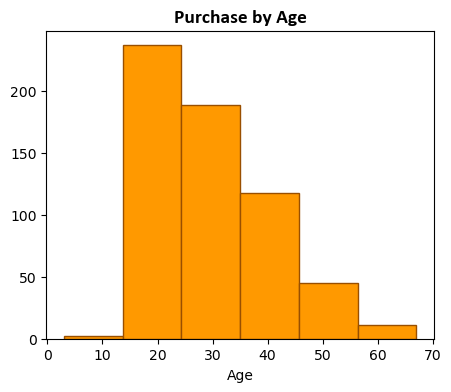

In [24]:
plt.figure(figsize=(5,4))
plt.hist(df_amazon["Age"], bins=6, color='#ff9900', edgecolor='#994F00')
plt.title('Purchase by Age', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.xlabel('Age')
plt.show()

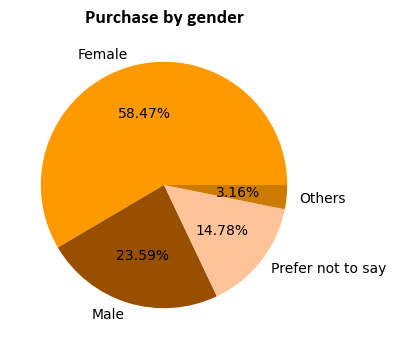

In [25]:
# gender demographics group engaged in online shopping
gender = df_amazon['Gender'].value_counts()
colors = ['#ff9900', '#994F00', '#FFC399', '#CC7A00']

plt.figure(figsize=(5,4))
plt.pie(gender, labels= gender.index, colors=colors, autopct='%1.2f%%')
plt.title('Purchase by gender', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.show()

##### The below chart reveals significant patterns across age groups and genders. To identify the demographics that dominates online shopping

C:\Users\HP\AppData\Local\Temp\ipykernel_11316\2888406180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics = df_amazon.groupby(['Age Group', 'Gender']).agg({'Purchase_Frequency':'count','Purchase_Categories':'count'}).reset_index()


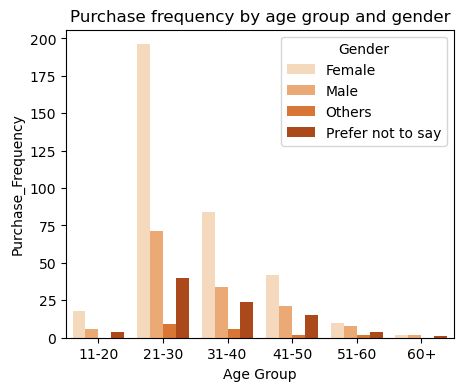

In [27]:
plt.figure(figsize=(5,4))
demographics = df_amazon.groupby(['Age Group', 'Gender']).agg({'Purchase_Frequency':'count','Purchase_Categories':'count'}).reset_index()
sns.barplot(data= demographics, x='Age Group', y='Purchase_Frequency', hue='Gender', palette='Oranges')
plt.title('Purchase frequency by age group and gender')
plt.show()

#### Reaserch Question 2 (What are the most frequently purchased product categories, and how does purchase frequency vary across different customer demographics and product types?)

##### Customer shopping pattern varies, some customers purchased multiple products from different categories while some purchased from single category. And for the sake of this analysis we would be looking at the top 10 and the least 10 purchased categories.

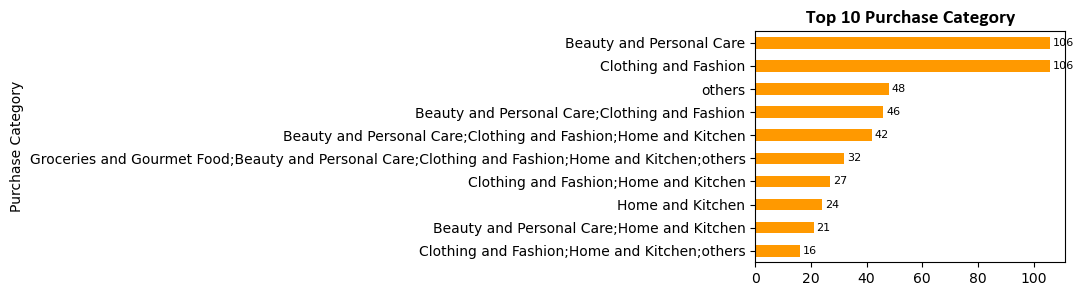

In [29]:
purchasecate = df_amazon['Purchase_Categories'].value_counts().head(10)

plt.figure(figsize=(4,3))
purchasecate.iloc[::-1].plot(kind='barh', color='#ff9900')
for index, value in enumerate(purchasecate.iloc[::-1]):
    plt.text(value + 1, index, str(value), va='center', fontsize=8, color='black')
plt.title('Top 10 Purchase Category', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.ylabel('Purchase Category')
plt.show()

In [30]:
df_amazon['Purchase_Categories'].value_counts().tail(10)

Purchase_Categories
Groceries and Gourmet Food;Home and Kitchen;others                                 6
Groceries and Gourmet Food;Clothing and Fashion                                    6
Groceries and Gourmet Food;Home and Kitchen                                        5
Beauty and Personal Care;Home and Kitchen;others                                   5
Groceries and Gourmet Food;Beauty and Personal Care;Home and Kitchen               4
Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen                   4
Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others            3
Groceries and Gourmet Food;Beauty and Personal Care;others                         3
Groceries and Gourmet Food;Clothing and Fashion;others                             2
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;others    1
Name: count, dtype: int64

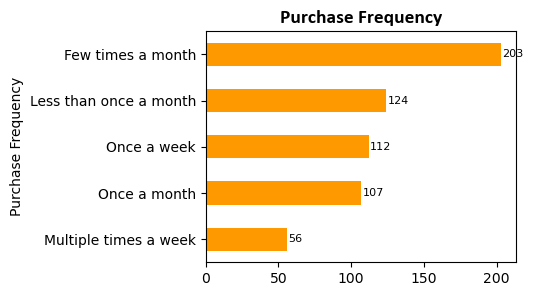

In [31]:
purchasefreq = df_amazon['Purchase_Frequency'].value_counts()

plt.figure(figsize=(4,3))
purchasefreq.iloc[::-1].plot(kind='barh', color='#ff9900')
for index, value in enumerate(purchasefreq.iloc[::-1]):
    plt.text(value + 1, index, str(value), va='center', fontsize=8, color='black')
plt.title('Purchase Frequency', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.ylabel('Purchase Frequency')
plt.show()

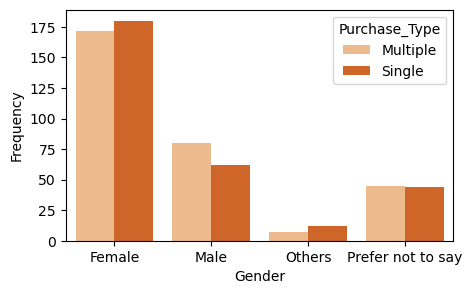

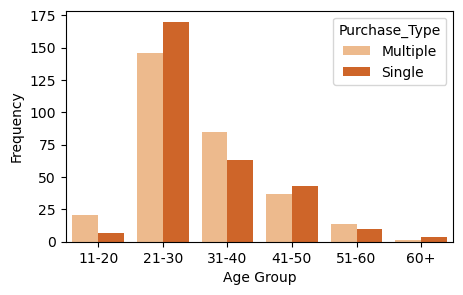

In [32]:
pfbg = df_amazon.groupby(['Gender', 'Purchase_Type']).size().reset_index(name='Frequency')
plt.figure(figsize=(5,3))
sns.barplot(data=pfbg, x='Gender', y='Frequency', hue='Purchase_Type', palette='Oranges')
plt.show()

purchase_preference = df_amazon.groupby(['Age Group', 'Purchase_Type'],observed=False).size().reset_index(name='Frequency')
plt.figure(figsize=(5,3))
sns.barplot(data=purchase_preference, x='Age Group', y='Frequency', hue='Purchase_Type', palette='Oranges')
plt.show()

#### Research Question 3 (How do customers' browsing frequencies and preferred product search methods impact their purchasing decisions and engagement levels on the platform?)

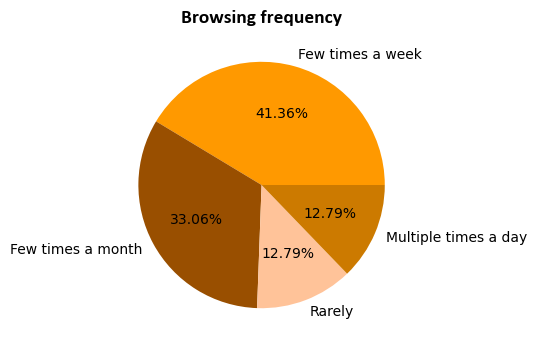

In [34]:
browsingfreq = df_amazon['Browsing_Frequency'].value_counts()
colors = ['#ff9900', '#994F00', '#FFC399', '#CC7A00']

plt.figure(figsize=(5,4))
plt.pie(browsingfreq, labels= browsingfreq.index, colors=colors, autopct='%1.2f%%')
plt.title('Browsing frequency', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.show()

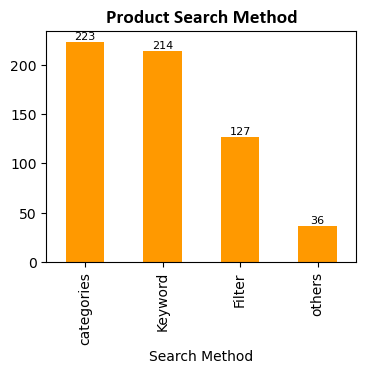

In [35]:
productsearch = df_amazon['Product_Search_Method'].value_counts()

plt.figure(figsize= (4,3))
productsearch.plot(kind= 'bar', color='#FF9900')
for i, value in enumerate(productsearch.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.title('Product Search Method', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.xlabel('Search Method')
# plt.ylabel('')
plt.show()

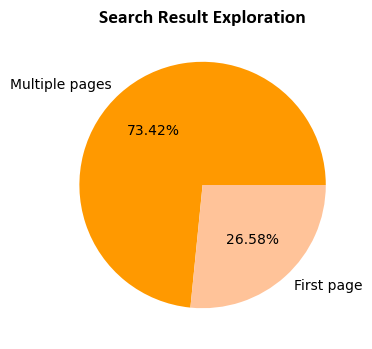

In [36]:
searchres = df_amazon['Search_Result_Exploration'].value_counts()
colors = ['#ff9900', '#FFC399']

plt.figure(figsize=(5,4))
plt.pie(searchres, labels= searchres.index, colors=colors, autopct='%1.2f%%')
plt.title('Search Result Exploration', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.show()

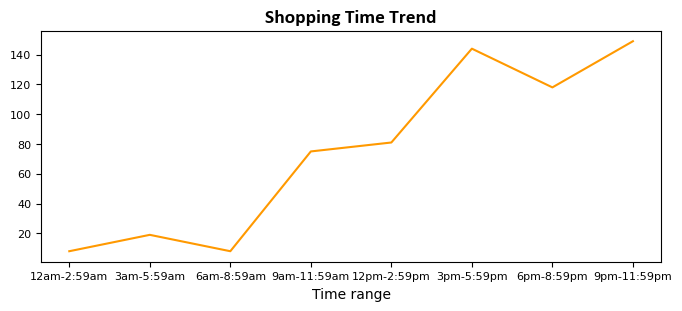

In [37]:
customorder = ['12am-2:59am', '3am-5:59am', '6am-8:59am', '9am-11:59am','12pm-2:59pm', 
               '3pm-5:59pm', '6pm-8:59pm', '9pm-11:59pm']
timerange = df_amazon['Time_Range'].value_counts()

timerange = timerange.reindex(customorder)

plt.figure(figsize= (8,3))
plt.plot(timerange, c='#FF9900')
plt.title('Shopping Time Trend', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.xlabel('Time range' )
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

#### Research Question 4 (To what extent do customers trust and find product reviews and recommendations helpful, and how do these factors affect their purchase decisions?)

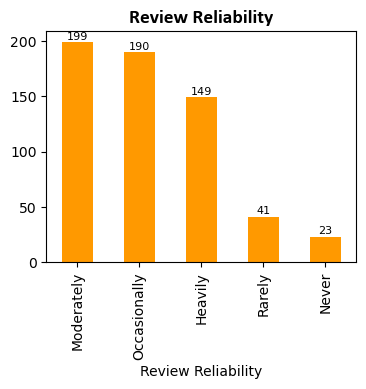

In [39]:
reviewrel = df_amazon['Review_Reliability'].value_counts()

plt.figure(figsize= (4,3))
reviewrel.plot(kind= 'bar', color='#FF9900')
for i, value in enumerate(reviewrel.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.title('Review Reliability', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.xlabel('Review Reliability')
# plt.ylabel('')
plt.show()

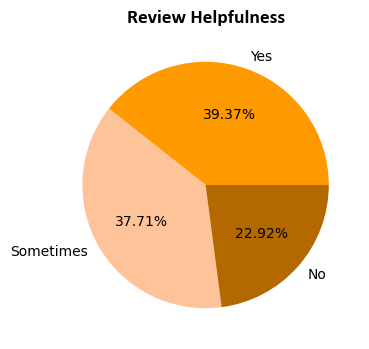

In [40]:
reviewhelp = df_amazon['Review_Helpfulness'].value_counts()
colors = ['#ff9900', '#FFC399', '#B36900']

plt.figure(figsize=(5,4))
plt.pie(reviewhelp, labels= reviewhelp.index, colors=colors, autopct='%1.2f%%')
plt.title('Review Helpfulness', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.show()

##### To know the impact of recommendation helpfulness on customer satisfaction. Customer rated therir satisfaction from 1 t0 5. 1 being the lowest whlie 5 the highest. The average satisfaction ratings will be used to analyze/show how helpful recommendation was to customers.

In [42]:
df_amazon.groupby('Recommendation_Helpfulness')['Shopping_Satisfaction'].mean().reset_index()

,Recommendation_Helpfulness,Shopping_Satisfaction
0,No,2.529070
1,Sometimes,2.586081
2,Yes,2.178344


#### Resaerch Question 5 (What are the key factors influencing customer satisfaction scores, and how can addressing these factors improve the overall shopping experience?)

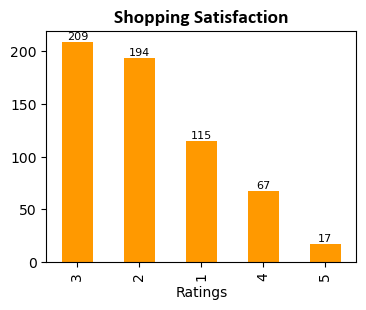

In [44]:
shopsatis = df_amazon['Shopping_Satisfaction'].value_counts()

plt.figure(figsize= (4,3))
shopsatis.plot(kind= 'bar', color='#FF9900')
for i, value in enumerate(shopsatis.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.title('Shopping Satisfaction', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.xlabel('Ratings')
# plt.ylabel('')
plt.show()

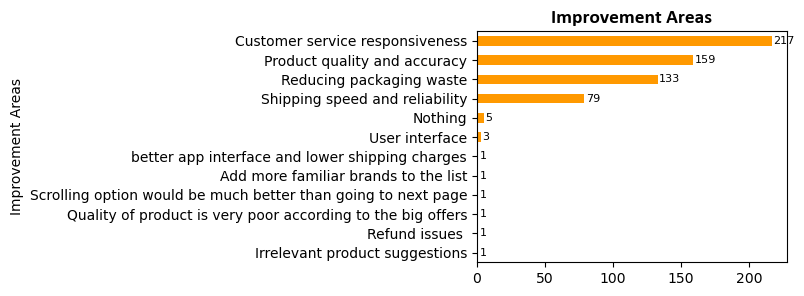

In [45]:
impar = df_amazon['Improvement_Areas'].value_counts()

plt.figure(figsize=(4,3))
impar.iloc[::-1].plot(kind='barh', color='#ff9900')
for index, value in enumerate(impar.iloc[::-1]):
    plt.text(value + 1, index, str(value), va='center', fontsize=8, color='black')
plt.title('Improvement Areas', fontdict={'fontname':'Calibri', 'fontweight':'bold', 'fontsize':14})
plt.ylabel('Improvement Areas')
plt.show()

In [46]:
df_amazon.groupby('Browsing_Frequency')['Shopping_Satisfaction'].mean().reset_index()


,Browsing_Frequency,Shopping_Satisfaction
0,Few times a month,2.527638
1,Few times a week,2.441767
2,Multiple times a day,2.116883
3,Rarely,2.714286


## Conclusion

 In this analysis, i discovered the following;
 1. The total number of customer that visited the website is 602.
 2. The female gender dominates the customer demographics accross all age group.
 3. Younger and middle-aged customers (21–40) dominate shopping activity.
 4. Beauty and personal care and clothing and fashion dominate as the most frequently purchased categories, either individually or in combination with other categories, while categories involving groceries and gourmet food see less traction among customers.
 5. Significant portion of customers actively engage with the platform on a weekly basis.
 6. Customers primarily rely on structured navigation methods, such as categories and keywords, to explore products effectively.
 7. Customers who found recommendations helpful only "sometimes" reported the highest average shopping satisfaction rating.
 8. Majority of customers rated their satisfaction as 3 out of 5 while higher satisfaction ratings were less frequent, with5 out of 5 being the least common.
 9. Customer service responsiveness was the most commonly highlighted concern, followed by product quality and accuracy, reducing packaging waste, and 
shipping speed and reliabilit.
10. Customers who browse rarely report the highest average shopping satisfaction while those browsing multiple times a day report the lowest satisfaction..

       